In [1]:
import numpy as np
import collections
from collections import deque
import tensorflow as tf
import cv2
from skimage import exposure



In [2]:
hello = tf.constant('Hello, TensorFlow!')

# Start tf session
sess = tf.Session()

# Run the op
print(sess.run(hello))
print(sess.run(hello))
sess.close()

with tf.Session() as sess:
    print(sess.run(hello))
    a= tf.constant([10.0, 20.0])
    v = sess.run(a)
    print(v)
    b=tf.constant([1.0,2.0])
    print(b)
    v = sess.run([a,b])
    print(v)
    print(type(v))
#     print(type([1,2,3]))
#     print(type(np.array([3,2,2])))
#     print(v[0])
    MyData = collections.namedtuple('MyData', ['a', 'b'])
    p = MyData(2,3)
    print(p, p[1], p.a)
    v=sess.run({'k1':MyData(a,b), 'k2':[b,a]})
    print(v)

    
print('done')



b'Hello, TensorFlow!'
b'Hello, TensorFlow!'
b'Hello, TensorFlow!'
[ 10.  20.]
Tensor("Const_2:0", shape=(2,), dtype=float32)
[array([ 10.,  20.], dtype=float32), array([ 1.,  2.], dtype=float32)]
<class 'list'>
MyData(a=2, b=3) 3 2
{'k2': [array([ 1.,  2.], dtype=float32), array([ 10.,  20.], dtype=float32)], 'k1': MyData(a=array([ 10.,  20.], dtype=float32), b=array([ 1.,  2.], dtype=float32))}
done


In [3]:
sess = tf.InteractiveSession()
a = tf.constant(32)
b=tf.constant(2)
c=a*b
res = c.eval()
print(c, res, sess.run(c))
x = tf.constant(23)
y = tf.constant(5)
z = x*y
with tf.Session() as s:
    print(s.run(z))

sess.close()

Tensor("mul:0", shape=(), dtype=int32) 64 64
115


In [4]:
num_labels = 10

t1 = tf.constant([2,3,4,5,7,65,4,3])
# label_batch is a tensor of numeric labels to process
# 0 <= label < num_labels

sparse_labels = tf.reshape(t1, [1,8,1,1])
# derived_size = tf.shape(label_batch)[0]
# indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
# concated = tf.concat(1, [indices, sparse_labels])
# outshape = tf.pack([derived_size, num_labels])
# labels = tf.sparse_to_dense(concated, outshape, 1.0, 0.0)
with tf.Session() as sess:
    v = sess.run(sparse_labels)
    idx = tf.constant([1,2,3])
    itxOh = tf.one_hot(idx, 8, on_value=2, off_value=0)
    oh = sess.run(itxOh)
    print(oh)


[[0 2 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0]
 [0 0 0 2 0 0 0 0]]


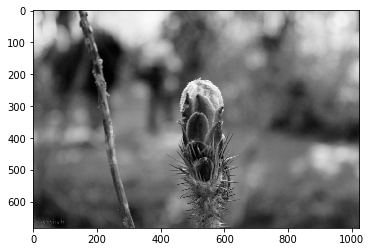

In [5]:
img1 = cv2.imread('media/coolthing1.jpg', 0)
# cv2.imshow('imgage', img1)
# cv2.waitKey()
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img1, cmap='gray')
plt.show()


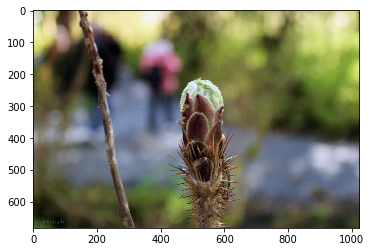

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x683 at 0x7F48C44D75F8>


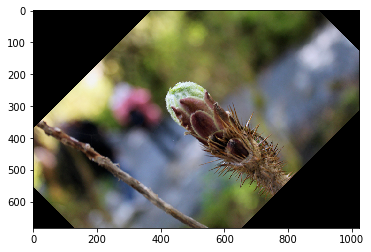

In [6]:
img2 = cv2.imread('media/coolthing1.jpg', 1)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
from PIL import Image

plt.imshow(img2)
plt.show()


im = Image.open('media/coolthing1.jpg')
print(im)
im1 = im.rotate(45)
plt.imshow(im1)
plt.show()


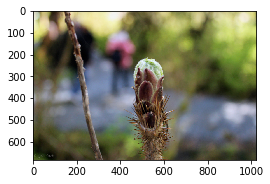

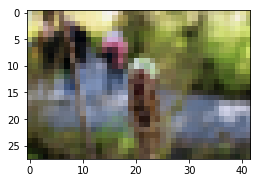

In [7]:

import glob, os


size = 42, 42
im2 = im.copy()
im2.thumbnail(size, Image.ANTIALIAS)
plt.figure(figsize=(4,4))
plt.imshow(im)
plt.show()
plt.figure(figsize=(4,4))
plt.imshow(im2)
plt.show()
im2.save('coolthing1.thumbnail','JPEG')


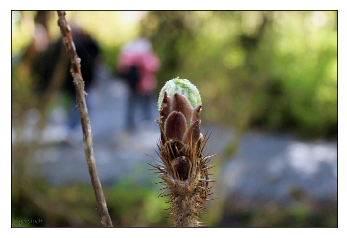

In [8]:
plt.imshow(im)
plt.xticks([])
plt.yticks([])
plt.show()


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x683 at 0x7F48C44D75F8>


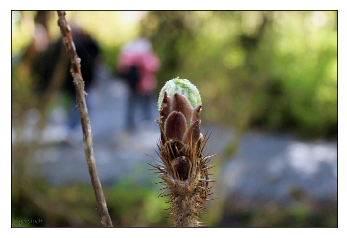

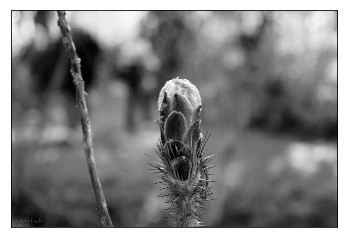

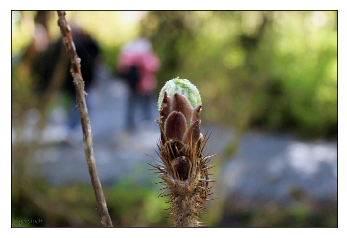

In [9]:
print(im)
im_array = np.array(im.convert('RGB'))
im_g = cv2.cvtColor(im_array, cv2.COLOR_RGB2GRAY)

plt.imshow(im_array)
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(im_g, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

im_cv2 = np.array(im)
plt.imshow(im_cv2);plt.xticks([]);plt.yticks([]);plt.show()


thum image type is <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=42x28 at 0x7F48C5D53128>


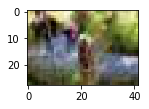

In [10]:
thum = Image.open('coolthing1.thumbnail');
print("thum image type is {0}".format(thum))
fig = plt.figure(figsize=(2,2))
plt.imshow(thum)
plt.show()


(683, 1024, 3)
(137, 102, 3) - small image, resize method #1 (see article 
http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html)


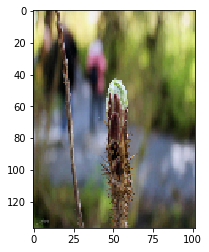

(1366, 2048, 3) - enlarged image, resize method #2


In [11]:
print(im_array.shape) #(683, 1024, 3)
res = cv2.resize(im_array, None, fx=0.1, fy=0.2, interpolation = cv2.INTER_CUBIC)
print(res.shape, "- small image, resize method #1 (see article \n\
http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html)")
plt.imshow(res);plt.show()
# http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html

height, width = im_array.shape[:2]
resL  = cv2.resize(im_array, (2*width, 2*height), interpolation=cv2.INTER_CUBIC)
print(resL.shape, "- enlarged image, resize method #2")

(683, 1024)
[[   1.    0.  100.]
 [   0.    1.   50.]]


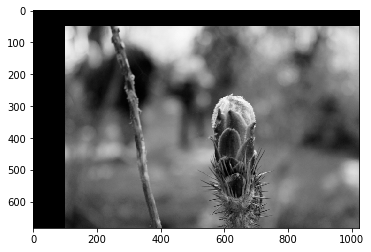

In [12]:
#warp affine
print(im_g.shape)
rows, cols = im_g.shape
M = np.float32([[1,0,100],[0,1,50]])
print(M)
dst = cv2.warpAffine(im_g, M, (cols, rows))
# cv2.imshow('img',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(dst, cmap='gray');plt.show()

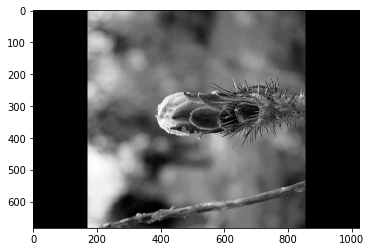

Shape of matrix M is:  (2, 3)
[[   0.8660254     0.5        -102.15500674]
 [  -0.5           0.8660254   301.75232461]]


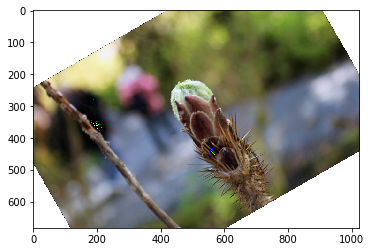

In [13]:
# rotation
rows, cols = im_g.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2),90, 1)
dst = cv2.warpAffine(im_g, M, (cols, rows))
plt.imshow(dst, cmap='gray');plt.show()

M = cv2.getRotationMatrix2D((cols/2, rows/2),30, 1)
print("Shape of matrix M is: ",M.shape)
print(M)
dst = cv2.warpAffine(im_array, M, (cols, rows))
# make black white
dst[dst<1] = 255
plt.imshow(dst, cmap='gray');plt.show()



[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


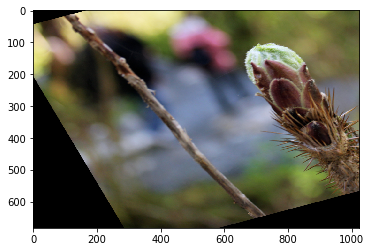

In [14]:
# Affine Transformation
# In affine transformation, all parallel lines in the original image will still be parallel in the output image
# http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1, pts2)
print(M)
dst = cv2.warpAffine(im_array, M, (cols, rows))
plt.imshow(dst);plt.show()

In [15]:
# Perspective Transformation


[[  1.05587376e+00   9.18151097e-02  -6.50969128e+01]
 [  4.69010049e-02   1.12562412e+00  -7.57920240e+01]
 [  1.83251448e-04   5.13337001e-04   1.00000000e+00]]


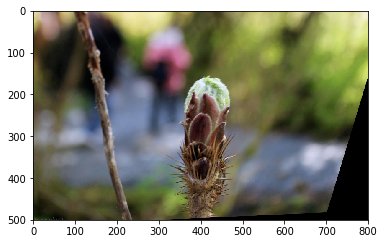

In [16]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)
dst = cv2.warpPerspective(im_array,M,(800,500))
plt.imshow(dst);plt.show()

(683, 1024, 3)


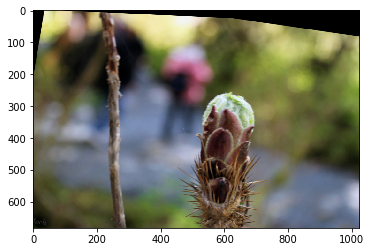

In [17]:
# one one image do a small rotation, an affine transform
rows, cols, ch = im_array.shape
M1 = cv2.getRotationMatrix2D((cols/2, rows/2), -6, 1)
dst = cv2.warpAffine(im_array, M1, (cols, rows))
print(dst.shape)
pts1 = np.float32([[1,1],[100,100],[300,900]])
pts2 = np.float32([[-2,-2],[110,110],[304,982]])

M2 = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(dst, M2, (cols,rows))

plt.imshow(dst);plt.show()


In [19]:
# using pickle
import pickle
favcolors = {'lion':'yellow','minion':'yellow','bear':'brown'}
pickle.dump(favcolors, open('favcolors.p','wb'))

fav_col_2 = pickle.load(open('favcolors.p','rb'))
print(fav_col_2)

{'bear': 'brown', 'minion': 'yellow', 'lion': 'yellow'}


In [27]:
# test deferentiating parameters
def t1(a='hello', b='bye'):
    print('we say {0} and {1}'.format(a,b))
t1(a='salut',b='pe curand')
dictionary = {'a':'privet','b':'poka'}
t1(**dictionary)

we say salut and pe curand
we say privet and poka
